In [1]:
import scraping_class
logfile = 'log.txt'## name your log file.
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [2]:
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math
from math import isnan

In [3]:
with open('df_final-COPY1.pkl', 'rb') as f:
    df = pickle.load(f)

## Data Structuring to graphs and tables

#### Function for couting the categories

In [4]:
def tlen(name):
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_value = []
    tlen_share = []
    for i in df[name].unique():
        tlen_id.append(i)
        tlen_value.append(len(df.loc[df[name] == i]))
        
    for i in df[name].unique():
        tlen_share.append((len(df.loc[df[name] == i])/sum(tlen_value)*100))
        
    tlen_id.append('Total')
    tlen_value.append(sum(tlen_value))
    tlen_share.append(sum(tlen_share))
        
        
    tlen['Id'] = tlen_id
    tlen['Value'] = tlen_value
    tlen['Share %'] = tlen_share
        
    return(tlen.sort_values('Value',ascending=True))

In [5]:
# Counting observation in one year
def tlen_year(name,year):
    df1 = df[df['Year'] == year]
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_value = []
    tlen_share = []
    for i in df[name].unique():
        tlen_id.append(i)
        tlen_value.append(len(df1.loc[df[name] == i]))
    
    for i in df[name].unique():
        tlen_share.append((len(df1.loc[df[name] == i])/sum(tlen_value)*100))
        
    tlen_id.append('Total')
    tlen_value.append(sum(tlen_value))
    tlen_share.append(sum(tlen_share))
        
    tlen['Id'] = tlen_id
    tlen['Value'] = tlen_value
    tlen['Share %'] = tlen_share
        
    return(tlen.sort_values('Value',ascending=True))

In [6]:
# Counting var by year 
def tlen_byyear(name):
    
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_1314 = []
    tlen_1415 = []
    tlen_1516 = []
    tlen_1617 = []
    tlen_1718 = []

    for i in df[name].unique():
        tlen_id.append(i)
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314.append(len(df1.loc[df[name] == i]))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415.append(len(df2.loc[df[name] == i]))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516.append(len(df3.loc[df[name] == i]))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617.append(len(df4.loc[df[name] == i]))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718.append(len(df5.loc[df[name] == i]))
    
    
        
    tlen_id.append('Total')
    tlen_1314.append(sum(tlen_1314))
    tlen_1415.append(sum(tlen_1415))
    tlen_1516.append(sum(tlen_1516))
    tlen_1617.append(sum(tlen_1617))
    tlen_1718.append(sum(tlen_1718))
    
        
    tlen['Id'] = tlen_id
    tlen['2013-2014'] = tlen_1314
    tlen['2014-2015'] = tlen_1415
    tlen['2015-2016'] = tlen_1516
    tlen['2016-2017'] = tlen_1617
    tlen['2017-2018'] = tlen_1718
        
    return(tlen)

In [7]:
# Share of category by year
def tlen_byyear_share(name):
    
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_1314 = []
    tlen_1415 = []
    tlen_1516 = []
    tlen_1617 = []
    tlen_1718 = []
    tlen_1314s = []
    tlen_1415s = []
    tlen_1516s = []
    tlen_1617s = []
    tlen_1718s = []

    for i in df[name].unique():
        tlen_id.append(i)
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314.append(len(df1.loc[df[name] == i]))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415.append(len(df2.loc[df[name] == i]))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516.append(len(df3.loc[df[name] == i]))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617.append(len(df4.loc[df[name] == i]))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718.append(len(df5.loc[df[name] == i]))
    
    for i in df[name].unique():
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314s.append(len(df1.loc[df[name] == i])/sum(tlen_1314))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415s.append(len(df2.loc[df[name] == i])/sum(tlen_1415))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516s.append(len(df3.loc[df[name] == i])/sum(tlen_1516))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617s.append(len(df4.loc[df[name] == i])/sum(tlen_1617))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718s.append(len(df5.loc[df[name] == i])/sum(tlen_1718))
        
    tlen['Id'] = tlen_id
    tlen['2013-2014'] = tlen_1314s
    tlen['2014-2015'] = tlen_1415s
    tlen['2015-2016'] = tlen_1516s
    tlen['2016-2017'] = tlen_1617s
    tlen['2017-2018'] = tlen_1718s
        
    return(tlen)

In [8]:
# Count group by variable
def tlen_bygroup(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(len(df1.loc[df[var] == k]))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))
        
            

In [9]:
#Calculate gpa when only passed exams are counted
snit = []
for i in range(0,len(df)):
    x_02 = df[2][i]
    x_04 = df[4][i]
    x_07 = df[7][i]
    x_10 = df[10][i]
    x_12 = df[12][i]
    
    number = (x_12,x_10,x_07,x_04,x_02)
    grades = [12,10,7,4,2]
    mydick = dict(zip(grades,number))
    cleandick = {k: mydick[k] for k in mydick if not isnan(mydick[k])}
    
    num = sum([x * y for x,y in mydick.items()])
    den = sum(mydick.values())
    
    snit.append(num/den)
    
df["Snit"] = snit

/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [10]:
# Defining total passed grades 
df['bestået'] = df[2] + df[4] + df[7] + df[10] + df[12]

# Making nan to 0 and creating var for weighted GPA and contribute to weight
l = []
for i in range(len(df['bestået'])):
    if isnan(df['bestået'][i]):
        l.append(0)
    else:
        l.append(df['bestået'][i])

df['bestået'] = l        
df['Snit_w0'] = df['Snit']
l = []
for i in range(len(df['Snit_w0'])):
    if isnan(df['Snit_w0'][i]):
        l.append(0)
    else:
        l.append(df['Snit_w0'][i])
        
df['Snit_w0'] = l
df['W_snit'] = df['Snit_w0']*df['bestået']/sum(df['bestået'])
df['w_bestået'] = df['bestået']*df['Credit_edit']

In [11]:
# Generating Level_all dummies

l = []
for i in range(len(df['Bachelor'])):
    if df['Bachelor'][i] == 1:
        l.append(1)
    elif df['Bachelor choice'][i] == 1:
        l.append(1)
    else:
        l.append(0)

df['Bachelor_all'] = l

l = []
for i in range(len(df['Master'])):
    if df['Master'][i] == 1:
        l.append(1)
    elif df['Full Degree Master choice'][i] == 1:
        l.append(1)
    elif df['Full Degree Master'][i] == 1:
        l.append(1)
    else:
        l.append(0)

df['Master_all'] = l

In [12]:
# creating w_ mean function
def w_mean(categories):
    d = {}
    df_stat1 = pd.DataFrame()
    df_stat1[''] = ['Weighted mean'] 
    for i in categories:
        d[i] = df[df[i] == 1]
        df_stat1[i] = [sum(pd.DataFrame.from_dict(d[i])['W_snit']*sum(df['bestået'])/sum(pd.DataFrame.from_dict(d[i])['bestået']))]
    return(df_stat1)

In [13]:
# Generating Level_only dummies
Master_only = []
Bachelor_only = []
Both = []
Other = []
for i in range(len(df['Bachelor_all'])):
    if df['Bachelor_all'][i] == 1:
        if df['Master_all'][i] == 1:
            Both.append(1)
            Master_only.append(0)
            Bachelor_only.append(0)
            Other.append(0)
        elif df['Master_all'][i] == 0:
            Both.append(0)
            Master_only.append(0)
            Bachelor_only.append(1)
            Other.append(0)
        else:
            print('error', df['Level'][i])
    elif df['Bachelor_all'][i] == 0:
        if df['Master_all'][i] == 1:
            Both.append(0)
            Master_only.append(1)
            Bachelor_only.append(0)
            Other.append(0)
        elif df['Master_all'][i] == 0:
            Both.append(0)
            Master_only.append(0)
            Bachelor_only.append(0)
            Other.append(1)
        else:
            print('error', df['Level'][i])
    else: 
        print('error', df['Level'][i])

df['Master_only'] = Master_only
df['Bachelor_only'] = Bachelor_only
df['Both'] = Both
df['Other'] = Other
 
w_mean(['Master_all', 'Bachelor_all','Master_only','Bachelor_only','Both','Other']);

In [14]:
# Copied from Jens 
# We need to weight the grades according to ECTS points. If we do not small courses will have the same weight as
# bigger courses. 
df['Weigthed_m3'] = df['Credit_edit'] * df[-3]
df['Weigthed_00'] = df['Credit_edit'] * df[0]
df['Weigthed_02'] = df['Credit_edit'] * df[2]
df['Weigthed_4'] = df['Credit_edit'] * df[4]
df['Weigthed_7'] = df['Credit_edit'] * df[7]
df['Weigthed_10'] = df['Credit_edit'] * df[10]
df['Weigthed_12'] = df['Credit_edit'] * df[12]
df[['Credit_edit',-3,'Weigthed_m3',0,'Weigthed_00',2,'Weigthed_02',4,'Weigthed_4',7,'Weigthed_7',10,'Weigthed_10',12,'Weigthed_12']];




In [15]:
# Copied from Jens: Weighting the Level categories

y_inner = []
y = []
x = ['02','4','7','10','12']

# Looking at each faculty 
for i in ['Master_only','Bachelor_only','Both','Other']:
    df_level = df[df[i]==1]
   
    for k in ['Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']:
        y_inner.append(df_level[k].sum(skipna = True)) 
    
    y.append(y_inner)
    y_inner=[]
    
y

# calc frequencies 
y_freq_inner = []
y_freq = []

# running through each faculty
for i in range(len(y)):
    
    # calc frequencies 
    for q in range(len(y[i])):
        y_freq_inner.append(y[i][q]/sum(y[i]))

    y_freq.append(y_freq_inner)
    y_freq_inner = []

#Number of grades given for each faculty. 
list_number_of_grades_faculties = []
for i in ['Master_only','Bachelor_only','Both','Other']:
    df_number_grades = df[df[i] == 1]
    list_number_of_grades_faculties.append(int(sum(df_number_grades[[12, 10, 7, 4, 2]].sum(skipna = True))))

list_number_of_grades_faculties

y_ects_freq = y_freq

In [16]:
#Generating var of Type of assesment with used categories
l = []
for i in range(len(df['Level'])):
    for k in ['Master_only','Bachelor_only','Both','Other']:
        if df[k][i] == 1:
            l.append(k)
df['Level_edit'] = l

l = []
for i in range(len(df['Type of assessmet_edit'])):
        if df['Type of assessmet_edit'][i] == 'Oral':
            l.append('Oral')
        elif df['Type of assessmet_edit'][i] == 'Written not under invigilation':
            l.append('Written not under invigilation')
        elif df['Type of assessmet_edit'][i] == 'Written under invigilation':
            l.append('Written under invigilation')
        else:
            l.append('Rest')
df['toa_edit'] = l
df[['toa_edit','Type of assessmet_edit']];
#tlen_bygroup_weight('toa_edit','Level_edit')

In [17]:
# function with weights 
def tlen_bygroup_weight(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(sum(df1[df[var] == k]['bestået']))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))

In [18]:
# Function with ECTS weights 
def tlen_bygroup_weight_ects(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(sum(df1[df[var] == k]['w_bestået']))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))

In [19]:
# Function calculating mean
def w_mean_g(categories, group):
    d = {}
    df_stat1 = pd.DataFrame()
    
    for i in categories:
        l = []
        for k in group:
            df1 = df[df['toa_edit'] == k]
            d[i] = df1[df1[i] == 1]
            l.append(sum(pd.DataFrame.from_dict(d[i])['W_snit']*sum(df['bestået'])/sum(pd.DataFrame.from_dict(d[i])['bestået'])))   
        df_stat1[''] = group
        df_stat1[i] = l
        
        
    return(df_stat1)


w_mean_g(['Bachelor_only','Master_only'], df['toa_edit'].unique()).set_index('');



,Bachelor_only,Master_only
,,
Rest,7.581014,8.756378
Oral,8.369963,9.262555
Written not under invigilation,7.658774,8.370590
Written under invigilation,6.564404,7.184503


### Output to Report

In [20]:
# Generating table for Censorship

df2 = df[df['Type of assessmet_edit'] == 'Oral' ]
df_nocen = df[df['Censorship form_edit'] == 'No external censorship']
df_cen = df[df['Censorship form_edit'] == 'External censorship']



df_stat1 = pd.DataFrame()
df_stat1[''] = ['Weighted mean'] 
df_stat1['External censorship'] = [sum(df_cen['W_snit']*sum(df['bestået'])/sum(df_cen['bestået']))]
df_stat1['No external censorship'] = [sum(df_nocen['W_snit']*sum(df['bestået'])/sum(df_nocen['bestået']))]
print(df_stat1.set_index('').to_latex())

\begin{tabular}{lrr}
\toprule
{} &  External censorship &  No external censorship \\
              &                      &                         \\
\midrule
Weighted mean &             7.634352 &                7.762438 \\
\bottomrule
\end{tabular}



#### Table. Disribution of year and faculty

In [21]:
print(tlen_byyear('Fakultet').to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
                                       Id &  2013-2014 &  2014-2015 &  2015-2016 &  2016-2017 &  2017-2018 \\
\midrule
 Det Natur- og Biovidenskabelige Fakultet &        519 &       1161 &       1205 &       1185 &       1207 \\
      Det Samfundsvidenskabelige Fakultet &        225 &        456 &        534 &        497 &        513 \\
                Det Humanistiske Fakultet &        212 &        421 &        758 &        341 &        244 \\
      Det Sundhedsvidenskabelige Fakultet &        238 &        651 &        637 &        672 &        671 \\
                   Det Juridiske Fakultet &        117 &        269 &        310 &        288 &        280 \\
                  Det Teologiske Fakultet &         35 &         82 &         83 &         86 &         87 \\
                                    Total &       1346 &       3040 &       3527 &       3069 &       3002 \\
\bottomrule
\end{tabular}



#### List of categories we've made

In [22]:
cat_list = ['Aid_edit', 'Marking scale_edit', 'Censorship form_edit', 'Duration_edit', 'Language_edit', 'Type of assessmet_edit']
di = {}
list_1 = []
for i in cat_list:
    list_1 = []
    for k in df[i].unique():
        list_1.append(k)
    di[i]=list_1
print(pd.DataFrame.from_dict(di, orient='index').T.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
                  Aid\_edit &       Marking scale\_edit &    Censorship form\_edit &        Duration\_edit & Language\_edit &            Type of assessmet\_edit \\
\midrule
                       nan &    7-point grading scale &  No external censorship &              1 block &       English &    Continuous assessment not exam \\
          All aids allowed &                      nan &     External censorship &           1 semester &        Danish &                              Oral \\
 Only certain aids allowed &        passed/not passed &                     nan &  Other/Not specified &         Other &    Written not under invigilation \\
      Written aids allowed &  completed/not completed &                    None &             2 blocks &          None &                         Portfolio \\
              Without aids &       Without assessment &                    None &                 None &          None &        Written under invigilation \\
    

#### Graph for cecnsorship 

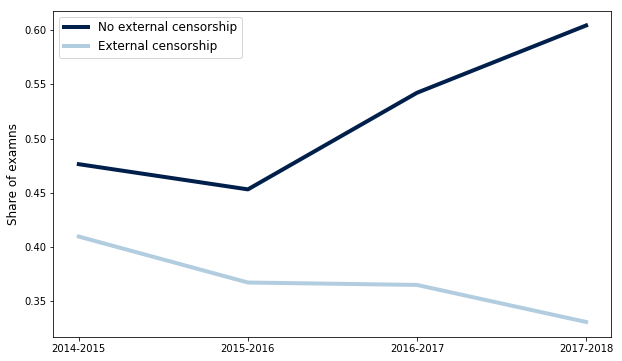

In [23]:
f, axs = plt.subplots(figsize=(10,6))
graph_df = tlen_byyear_share('Censorship form_edit').set_index('Id').T.reset_index()


plt.plot(graph_df['index'][1:],graph_df['No external censorship'][1:],label = 'No external censorship',color = "#011f4b", linewidth=4.0)
plt.plot(graph_df['index'][1:],graph_df['External censorship'][1:],label = 'External censorship',color = "#b3cde0", linewidth=4.0)


plt.legend(loc='best', fontsize = 12)
plt.ylabel('Share of examns',fontsize = 12)
plt.show()
f.savefig('mag3_Censorship_year.png')

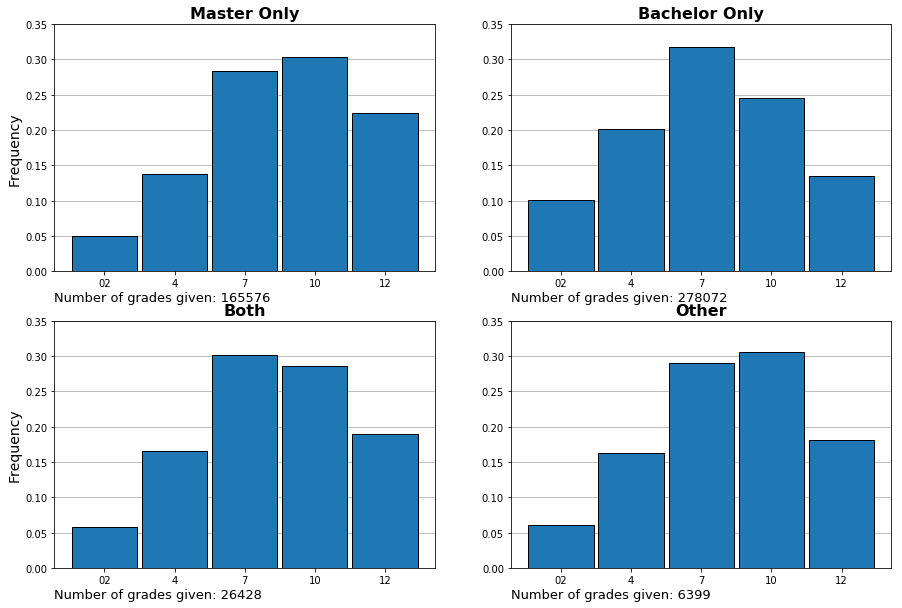

In [24]:
# Historgram of distributions by level
Faculty_names = ['Master Only','Bachelor Only','Both','Other']

f, ax = plt.subplots(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.title(Faculty_names[0], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[0]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[0], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 2)
plt.title(Faculty_names[1], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[1]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[1], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 3)
plt.title(Faculty_names[2], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[2]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[2], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 4)
plt.title(Faculty_names[3], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[3]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[3], width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_grades_split_Level_ECTS_weight.png')

/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


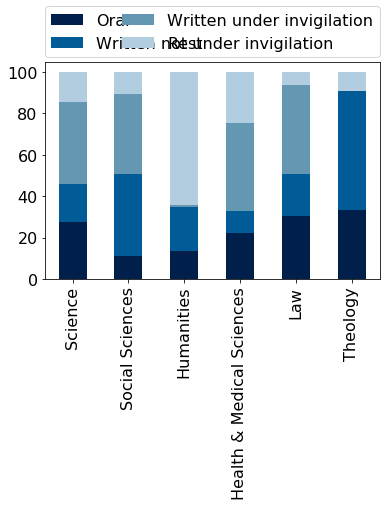

In [25]:
#Diagram of type of assessment
colors = ["#011f4b","#005b96","#6497b1",'#b3cde0']

d = tlen_bygroup_weight('toa_edit','Fakultet')
di = {}
di['ID'] = ['Rest', 'Oral', 'Written not under invigilation', 'Written under invigilation']
for i in d.columns.unique():
    l = []
    for k in range(len(d['Det Natur- og Biovidenskabelige Fakultet'])):
        l.append(d[i][k]/sum(d[i])*100)
    
    di[i] = l
    
dfcat = pd.DataFrame.from_dict(di).set_index('ID') 
dfcat = dfcat.rename(columns ={'Det Natur- og Biovidenskabelige Fakultet':'Science','Det Samfundsvidenskabelige Fakultet':'Social Sciences','Det Humanistiske Fakultet':'Humanities','Det Sundhedsvidenskabelige Fakultet':'Health & Medical Sciences','Det Juridiske Fakultet':'Law','Det Teologiske Fakultet':'Theology'}).T[['Oral', 'Written not under invigilation', 'Written under invigilation','Rest']]
dfcat;

dfcat.plot(kind='bar', stacked=True, color = colors, fontsize = 16)
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.rcParams["figure.figsize"] = [10,10]
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2, fontsize = 16) #,weight = 'bold')
plt.tight_layout()
plt.savefig('mag_4.png')

/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


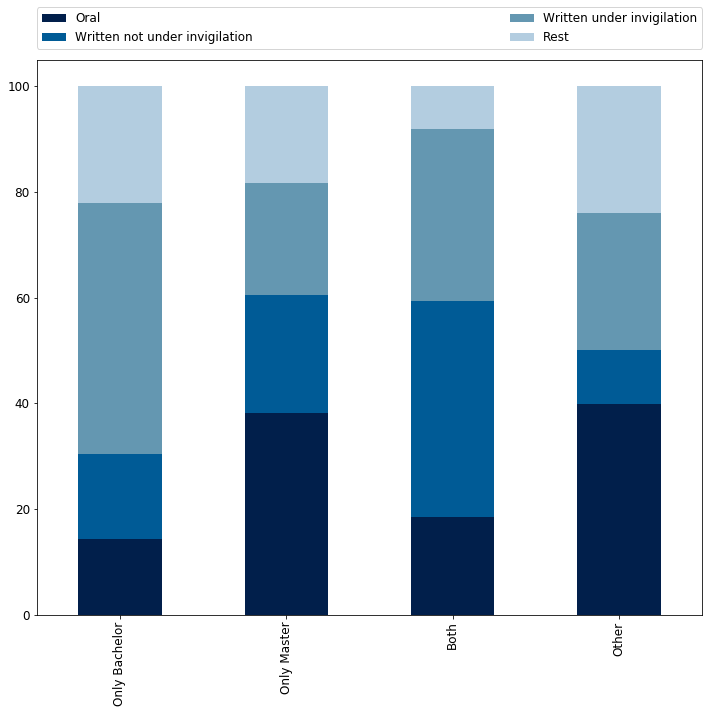

In [26]:
# Diagram of type of assessment
d = tlen_bygroup_weight('toa_edit','Level_edit')
di = {}
di['ID'] = ['Rest', 'Oral', 'Written not under invigilation', 'Written under invigilation']
for i in d.columns.unique():
    l = []
    for k in range(len(d['Master_only'])):
        l.append(d[i][k]/sum(d[i])*100)
    
    di[i] = l
    
dfcat = pd.DataFrame.from_dict(di).set_index('ID') 
dfcat = dfcat.rename(columns ={'Bachelor_only': 'Only Bachelor','Master_only':'Only Master'}).T.reindex(index =['Only Bachelor','Only Master','Both','Other'])[['Oral', 'Written not under invigilation', 'Written under invigilation','Rest']]

colors = ["#011f4b","#005b96","#6497b1",'#b3cde0']


dfcat.plot(kind='bar', stacked=True, color = colors, fontsize = 12)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.rcParams["figure.figsize"] = [8,8]
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2, fontsize = 12) #,weight = 'bold')
plt.tight_layout()
plt.savefig('mag_2stacked_bar_share_ass_level.png')


In [27]:
# Table of GPA by type of assesment and Level
print(w_mean_g(['Bachelor_only','Master_only','Both','Other'], df['toa_edit'].unique()).set_index('').to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Bachelor\_only &  Master\_only &      Both &     Other \\
                               &                &              &           &           \\
\midrule
Rest                           &       7.581014 &     8.756378 &  8.619758 &  8.430719 \\
Oral                           &       8.369963 &     9.262555 &  8.650164 &  8.361100 \\
Written not under invigilation &       7.658774 &     8.370590 &  8.240386 &  7.975831 \\
Written under invigilation     &       6.564404 &     7.184503 &  6.930722 &  6.714200 \\
\bottomrule
\end{tabular}

